In [ ]:
!pip install transformers[torch]
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'learning-agency-lab-automated-essay-scoring-2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71485%2F8059942%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240529%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240529T050008Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5a35801da68cf1e046199c5bd50816aae24120214cad1963db251a327a357bee35f006d43f56651c06a3eb0e0389b019dd2e25c9fb1b375dfff8297ccf6323e40d0ceb09c20ca3603543d830f0ce75ba03a05727139553966d373399282a04a73100a0b34311d1771efd4f47aa2790471f57cd843e00a3f341c264693e65103c51e45238b0b1c36f8d0a76ec4719705e8b211b17a5e0f194e92050a37d282adad6347c8b289104ee69fcecf74f92ad0233ca20287e18d9af2ed0fdf081710682abeb46f9fac4f4352024ee593890c122d602e4d7190446d3a64b88fa409469034351328233e7de79e520873d3dfaf341d1c44d2c7e64e883dfa15707be191f82'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12464821 bytes downloaded
Downloaded and uncompressed: learning-agency-lab-automated-essay-scoring-2
Data source import complete.


# Automated Essay Score 2.0

The `AutoModelForSequenceClassification` is a class specifically designed for sequence classification tasks. Sequence classification tasks involve taking an input sequence (e.g., a sentence or paragraph) and classifying it into one or more categories or label. [1]

**Approach:**

Ordinal Regression

1. [2] Regression with Text Input Using BERT and Transformers
    - [4] Adapted to use **quadratic weighted kappa** metric instead of accuracy.
1. [3] Adding additional tokens for paragraphing (`'\n'`) and double spacing (`'  '`).
1. [3] No Dropout for Regression

    
**Model:**

1. `microsoft/deberta-v3-small` https://huggingface.co/docs/transformers/en/model_doc/deberta

**References**

- HuggingFace
    - [1] [AutoModelForSequenceClassification](https://www.c-sharpcorner.com/article/sequence-classification-using-hugging-face-transformers-library/)
    - [Text classification](https://huggingface.co/docs/transformers/en/tasks/sequence_classification)
<br><br>

- Ordinal Text Classification
    - [4] [NEW! Loss Function For Ordinal Text Classification](https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/discussion/494873)
        - [Weighted kappa loss function for multi-class classification of ordinal data in deep learning](https://www.sciencedirect.com/science/article/abs/pii/S0167865517301666)
    - [2] [Regression with Text Input Using BERT and Transformers]()
        - [3. Fine-tuning with a Text Classification Model](https://lajavaness.medium.com/regression-with-text-input-using-bert-and-transformers-71c155034b13)
        - [4. Fine-tuning with a Regression Model](https://lajavaness.medium.com/regression-with-text-input-using-bert-and-transformers-71c155034b13)
<br><br>

- Kaggle
    - [3] [DeBERTa Starter Suggestions and Tips - LB 0.800+](https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/discussion/497832)
        - [DeBERTa-v3-SMALL Starter - [CV 0.820 LB 0.800]](https://www.kaggle.com/code/cdeotte/deberta-v3-small-starter-cv-0-820-lb-0-800/notebook)
        - [The Magic of No Dropout](https://www.kaggle.com/competitions/commonlitreadabilityprize/discussion/260729)

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Get Data

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

os.environ["TOKENIZERS_PARALLELISM"] = 'true'

PATH_PREFIX = './kaggle'
if not os.path.exists(f'{PATH_PREFIX}/input'):
    PATH_PREFIX = '/kaggle'

FILES = {
    'train': [
        f'{PATH_PREFIX}/input/learning-agency-lab-automated-essay-scoring-2/train.csv',
    ],
    'test': [
        f'{PATH_PREFIX}/input/learning-agency-lab-automated-essay-scoring-2/test.csv',
    ],
}

class CFG:
    model_root =  'albert/albert-base-v2' # 'distilbert/distilbert-base-uncased'
    max_length = 512
    batch_size = 8
    model_name = f"{model_root.split('/')[1]}-finetuned-aes-{str(max_length)}"
    model_checkpoint = f'{PATH_PREFIX}/working/{model_name}'
    # Downloaded model files for local testing.
    model_kaggle = f'{PATH_PREFIX}/input/{model_name}/transformers/1/1'
    hub_checkout = f'marksusol/{model_name}'


class EssayDataFrame():
    def __init__(self, file='train', target='score'):
        self.file = file
        self.data = self.get_data(file)
        if target in self.data:
            self.data[target] = self.data[target].astype('int64')
            self.X, self.y = self.data.drop([target], axis=1), self.data[target]
        else:
            self.X, self.y = self.data, None

    def get_data(self, file):
        df = pd.read_csv(FILES[file][0])
        return df

    def get_split_datasets(self):
        """
        essay = EssayDataFrame(file='train')
        X, y = essay.X, essay.y
        X_train, X_validation, y_train, y_validation = essay.get_split_datasets()
        """
        return train_test_split(self.X, self.y, stratify=self.y, test_size=0.2, random_state=42)

essay = EssayDataFrame(file='train')
essay.data.groupby('score', group_keys=False).apply(lambda x: x.sample(3))

,essay_id,full_text,score
12288,b4d82ca,The planet venus is a danger place according t...,1
10386,995e34c,"First, he talk about the venus whihc is reffer...",1
9531,8cad5af,"Germany-Residents are suburan pioneers, going ...",1
7681,72ec29e,Have you ever went on a camp out in the woods?...,2
8510,7e6ee52,Cars will always be one of the greatest invent...,2
17004,fb67f03,The use of this technology to read the emotion...,2
3847,3916a44,My position on driverless cars are that I am a...,3
7629,722a9e2,"Driverless cars are coming to us soon, which m...",3
8087,78ec7f6,There is a lot of technology being made to try...,3
7457,6fc833f,As of April 2013 the number of miles driven pe...,4


In [ ]:
print(essay.data['full_text'][1])

I am a scientist at NASA that is discussing the "face" on mars. I will be explaining how the "face" is a land form. By sharing my information about this isue i will tell you just that.

First off, how could it be a martions drawing. There is no plant life on mars as of rite now that we know of, which means so far as we know it is not possible for any type of life. That explains how it could not be made by martians. Also why and how would a martion build a face so big. It just does not make any since that a martian did this.

Next, why it is a landform. There are many landforms that are weird here in America, and there is also landforms all around the whole Earth. Many of them look like something we can relate to like a snake a turtle a human... So if there are landforms on earth dont you think landforms are on mars to? Of course! why not? It's just unique that the landform on Mars looks like a human face. Also if there was martians and they were trying to get our attention dont you thi

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00


In [ ]:
from datasets import concatenate_datasets, ClassLabel, Dataset, DatasetDict, Sequence

class BuildDatasets:

    def __init__(self, files, limit=False):
        self.files = files
        self.limit = limit
        self.datasets = self.load_data(files)

    def load_data(self, files) -> Dataset:
        dataset = {}
        for split in files.keys():
            datasets = []
            for file in files[split]:
                ds = self.get_dataset(file)
                datasets.append(ds)
            dataset[split] = concatenate_datasets(datasets)
        ds = DatasetDict({'train': dataset['train'], 'test': dataset['test']})

        # TODO: assert tokenized_ds['train'].features['label'].dtype == 'float64'
        # score_names = sorted(list(set(dataset['train']['label'])))
        #ds['train'] = ds['train'].cast_column('label', ClassLabel(num_classes=len(score_names), names=score_names))
        return ds

    def get_dataset(self, filename, target='score') -> Dataset:
        df = pd.read_csv(open(filename))
        if self.limit and target in df.columns:
            df_sample = df.groupby(target, group_keys=False).apply(lambda x: x.sample(100))
            data = Dataset.from_pandas(df_sample)
        else:
            data = Dataset.from_pandas(df)
        dataset = {
            'essay_id': [x['essay_id'] for x in data],
            'text': [x['full_text'] for x in data], # [1]
            # TODO: 'tokens': [x['tokens'] for x in data],
        }
        if target in data[0].keys():
            dataset[target] = [x[target] for x in data]
            dataset['label'] = [float(x[target] - 1) for x in data] # Apply float() here

        return Dataset.from_dict(dataset)

essay = BuildDatasets(FILES, limit=False)
essay.datasets

DatasetDict({
    train: Dataset({
        features: ['essay_id', 'text', 'score', 'label'],
        num_rows: 17307
    })
    test: Dataset({
        features: ['essay_id', 'text'],
        num_rows: 3
    })
})

In [ ]:
essay.datasets['train'].features

{'essay_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'score': Value(dtype='int64', id=None),
 'label': Value(dtype='float64', id=None)}

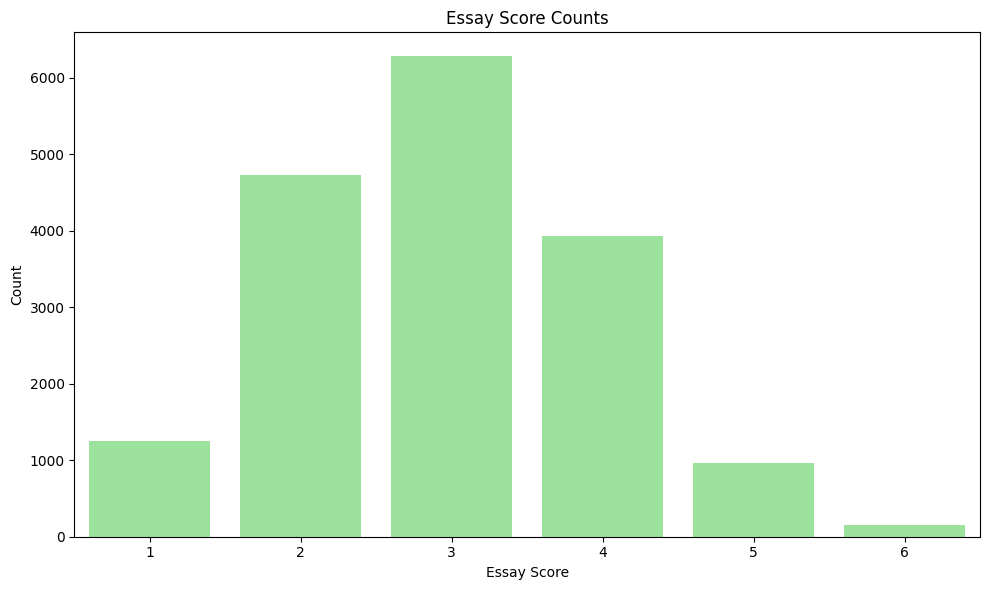

In [ ]:
ds = essay.datasets['train']
df = ds.to_pandas()

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=df['score'].to_list(), color='lightgreen', ax=ax)

ax.set_title('Essay Score Counts')
ax.set_xlabel('Essay Score')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

**^ imbalanced classification problem**

# TODO: Tokenization w/ token count distribution plot

In [ ]:
!pip install nltk
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk import word_tokenize

#df['token_cnt'] = df['tokens'].apply(lambda x: len(x))  # TODO: Need `tokens` in datasets
df['token_cnt'] = df['text'].apply(lambda x: len(word_tokenize(x)))
desc = df['token_cnt'].describe() # percentiles

#fig, ax = plt.subplots(figsize=(20, 6))

#sns.histplot(df['token_cnt'], ax=ax, kde=True, color='lightblue')
#ax.axvline(x=CFG.max_length, color="red", lw=2)

#percentiles = ['25%', '50%', '75%'] #, '90%', '95%']
#for i in range(len(percentiles)):
    #ax.axvline(desc[percentiles[i]], color='black')
#plt.show()

In [ ]:
if False:
    import spacy

    nlp = spacy.load("en_core_web_sm")

    text = "My name is John Smith and I work at Acme Corp in New York City."

    # Process the text with Spacy
    doc = nlp(text)

    def get_bio_tokens(doc):
        for token in doc:
            entity = 'O'
            for ent in doc.ents:
                if token in ent:
                    for i, e in enumerate(ent):
                        if token.text == e.text:
                            entity = f"B-{e.ent_type_}" if i == 0 else f"I-{e.ent_type_}"
                            break
            print(f"Token: {token.text}, Entity: {entity or 'None'}")

    get_bio_tokens(doc)
    spacy.displacy.render(doc, style='ent', jupyter=True)

    text = essay.datasets['train']['text'][1]
    doc = nlp(text)

    #get_bio_tokens(doc)
    spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
import transformers
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
from tokenizers import AddedToken


class ClassificationDatasetTokenizer:

    def __init__(self, ds, checkpoint, max_length=CFG.max_length, is_train=True):
        self.max_length = max_length
        self.num_labels = 6  # Regression: 1 vs. Classification: 6
        self.dataset = ds
        self.checkpoint = checkpoint
        self.is_train = is_train
        self.set_tokenizer()
        self.tokenized_dataset = self.dataset.map(self.tokenize, batched=True)
        if self.is_train:
            self.tokenized_datasets = self.get_split_tokenized_dataset()

    def set_tokenizer(self):
        self.tokenizer = AutoTokenizer.from_pretrained(self.checkpoint)

        # ADD NEW TOKENS for ("\n") new paragraph and (" "*2) double space
        self.tokenizer.add_tokens([AddedToken('\n', normalized=False)])
        self.tokenizer.add_tokens([AddedToken(' '*2, normalized=False)])

        assert isinstance(self.tokenizer, transformers.PreTrainedTokenizerFast)
        assert self.tokenizer.is_fast == True

    def tokenize(self, data):
        return self.tokenizer(data['text'], max_length=self.max_length, padding='max_length', truncation=True)

    def get_split_tokenized_dataset(self) -> Dataset:
        # TODO: omission of stratify in `dataset.train_test_split`
        tokenized_datasets = self.tokenized_dataset.train_test_split(train_size=0.8, test_size=0.2, seed=42)
        tokenized_datasets['validation'] = tokenized_datasets['test']
        tokenized_datasets.pop('test')
        return tokenized_datasets

input = ClassificationDatasetTokenizer(essay.datasets['train'], CFG.model_root, CFG.max_length)
tokenized_ds = input.tokenized_datasets

assert tokenized_ds['train'].features['label'].dtype == 'float64'
tokenized_ds

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Map:   0%|          | 0/17307 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['essay_id', 'text', 'score', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 13845
    })
    validation: Dataset({
        features: ['essay_id', 'text', 'score', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3462
    })
})

In [ ]:
tokenized_ds['train'].to_pandas()[['essay_id', 'text', 'score', 'label']].head()

,essay_id,text,score,label
0,ea26dc4,I belive that they should change the elections...,3,2.0
1,5987254,"Every theory needs to have proof, or else no o...",3,2.0
2,47ba414,Do you know that studying Venus is a worthy pu...,2,1.0
3,08d9638,Driverless cars sound like something that you ...,4,3.0
4,2a45bab,Introduction:This essay is going to be about c...,1,0.0


In [ ]:
from sklearn.metrics import cohen_kappa_score
from transformers import DataCollatorWithPadding, EarlyStoppingCallback, Trainer, TrainingArguments

def set_device():
    if torch.cuda.is_available():
        device = torch.device('cuda')
        device_count = torch.cuda.device_count()
        for i in range(device_count):
            print(torch.cuda.get_device_name(i), end=' ')
        print(f'({device_count})')
        torch.cuda.manual_seed_all(42)
        torch.cuda.synchronize()
        print('Info: Device set to CUDA.')
    elif torch.backends.mps.is_available():
        # MPS (Apple's Metal Performance Shaders) on macOS
        device = torch.device('mps')
        torch.mps.synchronize()
        print('Info: Device set to MPS.')
    else:
        device = torch.device('cpu')
        print('Info: Device set to CPU.')
    return device


class ClassificationTrainer(Trainer):
    """
    https://lajavaness.medium.com/regression-with-text-input-using-bert-and-transformers-71c155034b13
    """
    def compute_loss(self, model, inputs, return_outputs=False):
        #labels = inputs.pop("label") # label -> score
        labels = inputs.pop("labels") # label -> score
        outputs = model(**inputs)
        labels = labels.long()
        #logits = outputs[0][:, 0]
        loss = torch.nn.functional.cross_entropy(outputs.logits, labels)
        return (loss, outputs) if return_outputs else loss

class ClassificationModelTrainer:
    def __init__(self, model, tokenizer):
        self.device = set_device()
        self.model = (model).to(self.device)
        self.tokenizer = tokenizer
        self.data_collator = DataCollatorWithPadding(tokenizer)

    def compute_metrics_for_classification(self, eval_pred):
        logits, labels = eval_pred
        # logits가 파이토치 텐서인지 확인하고, 그렇다면 넘파이 배열로 변환
        if isinstance(logits, torch.Tensor):
            logits = logits.detach().cpu().numpy()
        if isinstance(labels, torch.Tensor):
            labels = labels.detach().cpu().numpy()

        # 각 로짓에서 최대값의 인덱스를 예측으로 사용
        preds = np.argmax(logits, axis=-1)

        # Cohen's Quadratic Weighted Kappa 계산
        qwk = cohen_kappa_score(labels, preds, weights='quadratic')
        return {'qwk': qwk}

    def train(self, train_ds, **kwargs):
        self.training_args = TrainingArguments(
            output_dir=CFG.model_checkpoint,
            fp16=True if self.device == 'cuda' else False,
            learning_rate=2e-5,
            per_device_train_batch_size=CFG.batch_size,  # 8 per GPU
            per_device_eval_batch_size=CFG.batch_size,
            num_train_epochs=10, # TODO:
            report_to='none',  # 'wandb'
            evaluation_strategy='epoch',
            save_strategy='epoch',
            load_best_model_at_end=True,
            metric_for_best_model='qwk',
            lr_scheduler_type='linear', # "cosine" or "linear" or "constant"
            optim='adamw_torch',
            do_eval=True,
            save_total_limit=1,
            #warmup_ratio=0.1,
            weight_decay=0.01,
            push_to_hub=False,
        )

        self.model_trainer = ClassificationTrainer(
            model=self.model,
            args=self.training_args,
            train_dataset=train_ds['train'],
            eval_dataset=train_ds['validation'],
            data_collator=self.data_collator,
            tokenizer=self.tokenizer,
            compute_metrics=self.compute_metrics_for_classification,
            callbacks=[
                EarlyStoppingCallback(early_stopping_patience=3,
                                      early_stopping_threshold=0.001)
            ],
        )

        self.model_trainer.train(**kwargs)
        self.model_trainer.save_model(CFG.model_checkpoint)
        self.tokenizer.save_pretrained(CFG.model_checkpoint)

In [ ]:
TRAIN_ROOT = True
FREEZE = False

if TRAIN_ROOT:
    #!rm -R {CFG.model_name}
    assert input.num_labels == 6

    # No Dropout for Regression.
    config = AutoConfig.from_pretrained(CFG.model_root)
    config.attention_probs_dropout_prob = 0.5
    config.hidden_dropout_prob = 0.5
    config.num_labels = 6
    config.max_position_embeddings = CFG.max_length

    model = AutoModelForSequenceClassification.from_pretrained(CFG.model_root, config=config)
    # Added additional tokens.
    model.resize_token_embeddings(len(input.tokenizer))

    if FREEZE:
        for param in model.deberta.parameters():
            param.requires_grad = False

    trainer = ClassificationModelTrainer(model, input.tokenizer)
    trainer.train(tokenized_ds)
else:
    assert os.path.isdir(CFG.model_checkpoint)

    model = AutoModelForSequenceClassification.from_pretrained(CFG.model_checkpoint)
    trainer = ClassificationModelTrainer(model, input.tokenizer)
    trainer.train(tokenized_ds, resume_from_checkpoint=True)

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert/albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tesla T4 (1)
Info: Device set to CUDA.


Epoch,Training Loss,Validation Loss,Qwk
1,1.477000,1.468140,0.000000
2,1.282300,1.323509,0.502450
3,1.144500,1.189764,0.633393
4,1.080800,1.210282,0.641809
5,1.026400,1.158477,0.698652
6,1.006900,1.467491,0.674776
7,0.983700,1.333460,0.641081


Epoch,Training Loss,Validation Loss,Qwk
1,1.477000,1.468140,0.000000
2,1.282300,1.323509,0.502450
3,1.144500,1.189764,0.633393
4,1.080800,1.210282,0.641809
5,1.026400,1.158477,0.698652
6,1.006900,1.467491,0.674776
7,0.983700,1.333460,0.641081
8,0.980800,1.452669,0.630507
